In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(os.path.abspath(""))))

# Correlación lineal

Teoría y ejemplos de correlación lineal con Python. Coeficiente de correlación de Pearson, Spearman, Kendall, correlación parcial y matriz de correlaciones.

## Introducción

La correlación lineal es un método estadístico que permite cuantificar la relación lineal existente entre dos variables. Existen varios estadísticos, llamados coeficientes de correlación lineal, desarrollados con el objetivo de medir este tipo de asociación, algunos de los más empleados son **Pearson**, **Spearman** y **Kendall**.

Con frecuencia, los estudios de correlación lineal preceden a análisis más complejos, como la creación de modelos de regresión. Primero, se analiza si las variables están correlacionadas y, en caso de estarlo, se procede a generar modelos.

Es importante destacar que, la existencia de correlación entre dos variables, no implica necesariamente causalidad. La asociación observada puede deberse a un tercer factor (confounder).

## Coeficientes de correlación lineal

### Covarianza

Para estudiar la relación lineal existente entre dos variables continuas es necesario disponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, que mide el grado de variación conjunta de dos variables aleatorias.

$$\text{Covarianza muestral} = Cov(X,Y)=\dfrac {\sum _{i=1}^{n}\left( x_{i}-\overline {x}\right) \left( y_{i}-\overline {y}\right) }{N-1}$$

donde $\overline{x}$ e $\overline{y}$ son la media de cada variable, y $x_i$ e $y_i$ son el valor de las variables para la observación $i$

Valores positivos indican que las dos variables cambian en la misma dirección y, valores negativos, que lo hacen en direcciones opuestas.

La principal limitación de la covarianza es que, su magnitud, depende de las escalas en que se miden las variables estudiadas. Esto implica que no puede utilizarse para comparar el grado de asociación entre pares de variables medidas en distintas escalas. Una forma de evitar esta limitación y poder hacer comparaciones consiste en estandarizar la covarianza, generando lo que se conoce como coeficientes de correlación.

### Coeficientes de correlación lineal

Los coeficientes de correlación lineal son estadísticos que cuantifican la asociación lineal entre dos variables numéricas. Existen diferentes tipos, de entre los que destacan el Pearson, Rho de Spearman y Tau de Kendall. Todos ellos comparten que:

- Su valor está comprendido en el rango [+1 , -1]. Siendo +1 una correlación positiva perfecta y -1 una correlación negativa perfecta.

- Se emplean como medida de la fuerza de asociación entre dos variables (tamaño del efecto):

  - 0: asociación nula.

  - 0.1: asociación pequeña.

  - 0.3: asociación mediana.

  - 0.5: asociación moderada.

  - 0.7: asociación alta.

  - 0.9: asociación muy alta.

Desde el punto de vista práctico, las principales diferencias entre estos tres coeficientes son:

- La correlación de Pearson funciona bien con variables cuantitativas que tienen una distribución normal o próxima a la normal. Es más sensible a los valores extremos que las otras dos alternativas.

- La correlación de Spearman se emplea con variables cuantitativas (continuas o discretas). En lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden ranking. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson.

- La correlación de Kendall es otra alternativa no paramétrica que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking. Es recomendable cuando se dispone de pocos datos y muchos de ellos ocupan la misma posición en el rango, es decir, cuando hay muchas ligaduras.


### Significancia estadística

Además del valor obtenido para el coeficiente de correlación, es necesario calcular su significancia estadística. Por muy cercano que sea el valor del coeficiente de correlación a $+1$ o $−1$, si no es significativo, no se dispone de evidencias suficiente para afirmar que existe una correlación real, ya que el valor observado podría deberse a simple aleatoriedad.

El test paramétrico de significancia estadística empleado para el coeficiente de correlación es el t-test. Donde el estadístico t se obtiene acorde a la ecuación:

$$t=\dfrac {r\sqrt{N-2}}{\sqrt{1-r^{2}}}$$

$r$ es el calor del coeficiente de correlación y N es el número de observaciones disponibles. Los grados de libertad se calculan como $df= N-2$

En este test, se considera como hipótesis nula ($H_0$) que las variables son independientes (coeficiente de correlación poblacional = 0), y como hipótesis alternativa $(H_a)$, que sí existe relación (coeficiente de correlación poblacional $\neq$ 0)

También se puede calcular la significancia de un coeficiente de correlación recurriendo a métodos no paramétricos como el **bootstrapping**.

### Tamaño de efecto

La correlación lineal, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado conocido como coeficiente de determinación $R^2$.

$R^2$ se interpreta como la cantidad de varianza de $Y$ explicada por $X$.
En el caso del coeficiente de Pearson y el de Spearman, $R^2$ se obtiene elevando al cuadrado el coeficiente de correlación. En el caso de Kendall no se puede calcular de este modo.

## Coeficiente de Pearson

El coeficiente de correlación de Pearson es la covarianza estandarizada.

$$\rho=\dfrac {Cov(X,Y)}{\sigma_{x}\sigma_{y}}$$

La anterior ecuación se corresponde con el coeficiente de Pearson poblacional $(\rho)$. En la práctica, raramente se tiene acceso a toda la población, por lo que su valor se estima a partir de una muestra mediante el coeficiente de Pearson muestral $(r).$

$$r_{xy}=\dfrac {\sum _{i=1}^{n}\left( x_{i}-\overline {x}\right) \left( y_{i}-\overline {y}\right) } {\sqrt {\sum _{i=1}^{n}\left( x_{i}-\overline {x}\right) ^{2}\sum _{i=1}^{n}}\overline {\left( y_{i}-\overline {y}\right) ^{2}}}$$

### Condiciones

Las condiciones que se deben de cumplir para que el coeficiente de correlación de Pearson sea válido son:

- La relación que se quiere estudiar es de tipo lineal (de lo contrario, el coeficiente de Pearson no la puede detectar).

- Las dos variables deben de ser numéricas.

- Normalidad: ambas variables se tienen que distribuir de forma normal. En la práctica, se suele considerar válido aun cuando se alejan moderadamente de la normalidad.

- Homocedasticidad: la varianza de $Y$ debe ser constante a lo largo de la variable $X$. Esto se puede contrastar si en un scatterplot los valores de $Y$ mantienen la misma dispersión en las distintas zonas de la variable $X$.

### Características

- Toma valores entre [-1, +1], siendo +1 una correlación lineal positiva perfecta y -1 una correlación lineal negativa perfecta.

- Es independiente de las escalas en las que se midan las variables.

- No varía si se aplican transformaciones a las variables.

- No tiene en consideración que las variables sean dependientes o independientes.

- El coeficiente de correlación de Pearson no equivale a la pendiente de la recta de regresión.

- Es sensible a outliers, por lo que se recomienda, en caso de poder justificarlos, excluirlos antes de realizar el cálculo.

## Coeficiente de Spearman (Spearman's rho)

El coeficiente de Spearman es el equivalente al coeficiente de Pearson pero con una previa transformación de los datos a ranking. Esto significa que, en lugar de utilizar directamente el valor de cada variable, los datos son ordenados y reemplazados por su respectivo orden (primero, segundo, tercero...). Se emplea como alternativa no paramétrica al coeficiente de Pearson cuando los valores son ordinales, o bien, cuando los valores son continuos pero no satisfacen la condición de normalidad.

$$r_{s}=1-\frac{6\sum d_{i}^{2}}{n (n^{2}-1)},$$

Siendo $d_i$ la distancia entre los rangos de cada observación $(x_i − y_i)$ y $n$ el número de observaciones.

El coeficiente de Spearman requiere que la relación entre las variables sea monótona, es decir, que cuando una variable crece la otra también lo hace o cuando una crece la otra decrece (que la tendencia sea constante).

Al trabajar con el orden de las observaciones en lugar de su valor real, tiene la característica de ser menos sensible que Pearson a valores extremos.

## Coeficiente Tau de Kendall

La correlación de Kendall es un método no paramétrico que, al igual que la correlación de Spearman, utiliza la ordenación de las observaciones ranking.

Es otra alternativa al coeficiente de correlación de Pearson cuando no se cumple la condición de normalidad. Suele utilizarse en lugar del coeficiente de Spearman cuando el número de observaciones es pequeño o los valores se acumulan en una región por lo que el número de ligaduras al generar el ranking es alto.

$$\tau= \frac{C-D}{\frac{1}{2}n(n-1)}$$

siendo $C$ el número de pares concordantes, aquellos en los que el rango de la segunda variable es mayor que el rango de la primera variable. $D$ el número de pares discordantes, cuando el rango de la segunda es igual o menor que el rango de la primera variable.

## Jackknife correlation

El coeficiente de correlación de Pearson resulta efectivo en ámbitos muy diversos. Sin embargo, tiene la desventaja de no ser robusto frente a outliers a pesar de que se cumpla la condición de normalidad. Si dos variables tienen un pico o un valle común en una única observación, por ejemplo por un error de lectura, la correlación va a estar dominada por este registro a pesar de que entre las dos variables no haya correlación real alguna. Lo mismo puede ocurrir en la dirección opuesta. Si dos variables están altamente correlacionadas excepto para una observación en la que los valores son muy dispares, entonces la correlación existente quedará enmascarada. Una forma de evitarlo es recurrir a la Jackknife correlation, que consiste en calcular todos los posibles coeficientes de correlación entre dos variables si se excluye cada vez una de las observaciones. El promedio de todas las Jackknife correlations calculadas atenúa en cierta medida el efecto del outlier.

$$\bar{\theta}_{(A,B)} = \text{Promedio Jackknife correlation (A,B)} = \frac{1}{n} \sum_{i=1}^n \hat r_i$$

donde $n$ es el número de observaciones y $\hat r_i$ es el coeficiente de correlación de Pearson estimado entre las variables $A$ y $B$, habiendo excluido la observación $i$.

Además del promedio, se puede estimar su error estándar ($SE$) y así obtener intervalos de confianza para la Jackknife correlation y su correspondiente p-value.

$$SE = \sqrt{\frac{n-1}{n} \sum_{i=1}^n (\hat r_i - \bar{\theta})^2}$$

Intervalo de confianza del 95% $(Z=1.96)$

$$\text{Promedio Jackknife correlation (A,B)}  \pm \ 1.96 *SE$$

$$\bar{\theta} - 1.96 \sqrt{\frac{n-1}{n} \sum_{i=1}^n (\hat r_i - \bar{\theta})^2} \ , \ \ \bar{\theta}+ 1.96 \sqrt{\frac{n-1}{n} \sum_{i=1}^n (\hat r_i - \bar{\theta})^2}$$

P-value para la hipótesis nula de que $\bar{\theta} = 0$

$$Z_{calculada} = \frac{\bar{\theta} - H_0}{SE}= \frac{\bar{\theta} - 0}{\sqrt{\frac{n-1}{n} \sum_{i=1}^n (\hat r_i - \bar{\theta})^2}}$$

$$p_{value} = P(Z > Z_{calculada})$$

Cuando se emplea este método es conveniente calcular la diferencia entre el valor de correlación obtenido por Jackknife correlation $(\bar{\theta})$ y el que se obtiene si se emplean todas las observaciones $(\bar{r})$. A esta diferencia se le conoce como Bias. Su magnitud es un indicativo de cuanto está influenciada la estimación de la correlación entre dos variables debido a un valor atípico u outlier.

$$Bias = (n-1)*(\bar{\theta} - \hat{r})$$

Si se calcula la diferencia entre cada correlación $(\hat r_i)$ estimada en el proceso de Jackknife y el valor de correlación $(\hat r)$ obtenido si se emplean todas las observaciones, se puede identificar que observaciones son más influyentes.

Cuando el estudio requiere minimizar al máximo la presencia de falsos positivos, a pesar de que se incremente la de falsos negativos, se puede seleccionar como valor de correlación el menor de entre todos los calculados en el proceso de Jackknife.

$$\text{Correlacion}= min \{ \hat r_1, \hat r_2,..., \hat r_n \}$$

A pesar de que el método de Jackknife permite aumentar la robustez de la correlación de Pearson, si los outliers son muy extremos su influencia seguirá siendo notable. Siempre es conveniente una representación gráfica de los datos para poder identificar si hay valores atípicos y eliminarlos. Otras alternativas robustas son la correlación de Spearman o el método de Bootstrapping.

##  Correlación parcial

Como se ha explicado, la correlación estudia la relación (lineal o monotónica) existente entre dos variables. Puede ocurrir que, la relación que muestran dos variables, se deba a una tercera variable que influye sobre las otras dos. A este fenómeno se le conoce como confounding. Por ejemplo, si se correlaciona el tamaño del pie de una persona con su inteligencia, se encuentra una correlación positiva alta. Sin embargo, dicha relación se debe a una tercera variable que está relacionada con las otras dos, la edad. La correlación parcial permite estudiar la relación lineal entre dos variables bloqueando el efecto de una tercera (o más) variables. Si el valor de correlación de dos variables es distinto al valor de correlación parcial de esas mismas dos variables, cuando se controla una tercera, significa que la tercera variable influye en las otras dos. La función en `partial_corr()` del paquete `pingouin` permite estudiar correlaciones parciales

## Librerías

In [3]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Proprocesado y analisis
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr


import warnings

warnings.filterwarnings("ignore")

# Configuracion de matplotlib
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16, 9)
sns.set_theme(style="whitegrid", context="notebook", palette="pastel")

## Datos

In [4]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)

In [5]:
# Se utilizan unicamente informacion de individuos mayores de 18 anios

datos = datos[datos['age'] > 18]

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


## Análisis gráfico

En primer lugar se representan las dos variables mediante un diagrama de dispersión _(scatterplot)_ para intuir si existe relación lineal o monotónica. Si no la hay, no tiene sentido calcular este tipo de correlaciones.

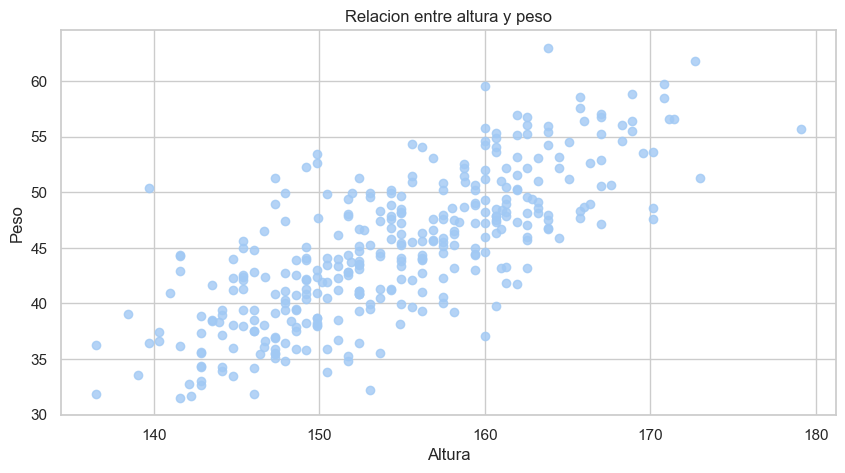

In [7]:
# Grafico
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.scatter(x=datos.height, y=datos.weight, alpha= 0.8)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso')
ax.set_title('Relacion entre altura y peso')
plt.show()

El diagrama de dispersión parece indicar una relación lineal positiva entre ambas variables.

Para poder elegir el coeficiente de correlación adecuado, se tiene que analizar el tipo de variables y la distribución que presentan. En este caso, ambas variables son cuantitativas continuas y pueden ordenarse para convertirlas en un ranking, por lo que, a priori, los tres coeficientes podrían aplicarse. La elección se hará en función de la distribución que presenten las observaciones: normalidad, homocedasticidad y presencia de outliers.

## Normalidad

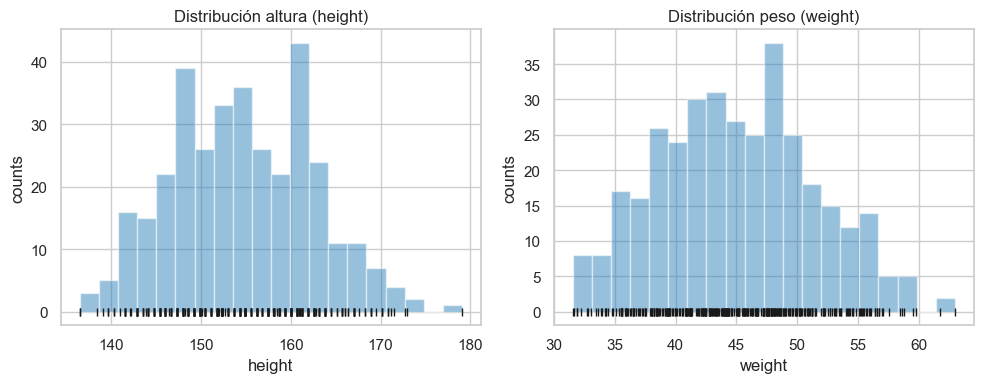

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=datos.height, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('height')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.weight, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.weight, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('weight')
axs[1].set_ylabel('counts')


plt.tight_layout()
plt.show()

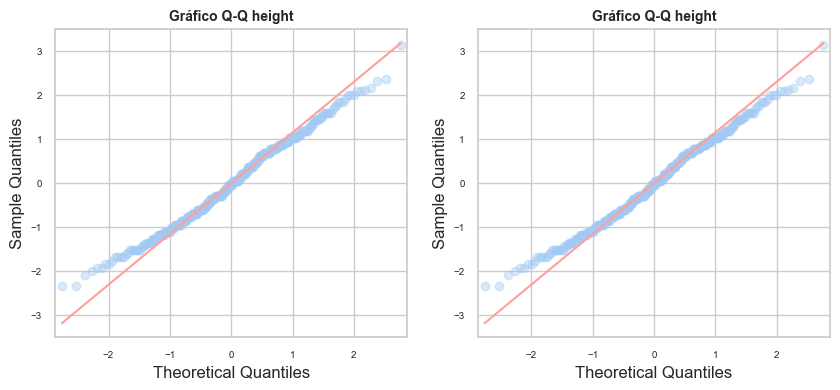

In [9]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

Además del estudio gráfico, se recurre a dos test estadísticos que contrasten la normalidad de los datos: **Shapiro-Wilk test** y **D'Agostino's K-squared test.** Este último es el que incluye el summary de `statsmodels` bajo el nombre de **Omnibus.**

En ambos test, la hipótesis nula considera que los datos siguen una distribución normal, por lo tanto, si el `p-value` no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.

In [10]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos.height)
print(f"Variable height: {shapiro_test}")
shapiro_test = stats.shapiro(datos.weight)
print(f"Variable weight: {shapiro_test}")

Variable height: ShapiroResult(statistic=0.9910705950686569, pvalue=0.034413216987494714)
Variable weight: ShapiroResult(statistic=0.9911816371339782, pvalue=0.0367282884335488)


In [11]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2}, p-value = {p_value}")

Variable height: Estadítico = 7.210790495766356, p-value = 0.02717670115638557
Variable weight: Estadítico = 8.402628478646044, p-value = 0.014975881988444982


El análisis gráfico y los test estadísticos muestran evidencias de que no se puede asumir normalidad en ninguna de las dos variables. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

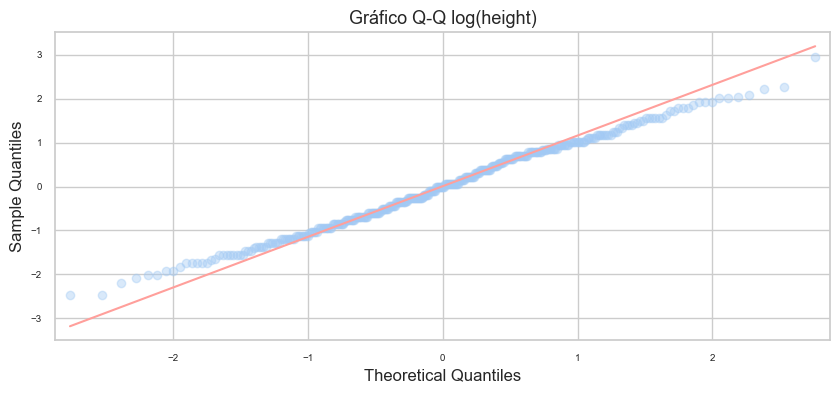

Variable height: ShapiroResult(statistic=0.9922663896096799, pvalue=0.06946765640621282)


In [12]:
# Transformación logarítmica de los datos
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

sm.qqplot(
    np.log(datos.height),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q log(height)', fontsize = 13)
ax.tick_params(labelsize = 7)
plt.show()


shapiro_test = stats.shapiro(np.log(datos.height))
print(f"Variable height: {shapiro_test}")

La trasformación logarítmica de la variable altura (height) consigue una distribución más próxima a la normal.

## Homocedasticidad

La homocedasticidad implica que la varianza se mantiene constante. Puede analizarse de forma gráfica representando las observaciones en un diagrama de dispersión y viendo si mantiene una homogeneidad en su dispersión a lo largo del eje X. Una forma cónica es un claro indicativo de falta de homocedasticidad. Dos test estadísticos utilizados para contrastar la homocedasticidad son: test de Goldfeld-Quandt y el de Breusch-Pagan.

Tal como muestra el diagrama de dispersión generado al inicio del ejercicio, no se aprecia ningún patrón cónico y la dispersión es constante.

## Coeficientes correlación

Debido a la falta de normalidad, los resultados generados por Pearson no son del todo precisos. Sin embargo, dado que la desviación de la normalidad es leve y no se aprecian outliers, con fines ilustrativos, se procede a calcular los tres tipos de coeficientes.

De nuevo recordar que, cuando alguna de las condiciones asumidas por un modelo o test estadístico no se cumplen, no significa que obligatoriamente se tenga que descartar, pero hay que ser consciente de las implicaciones que tiene y reportarlo siempre en los resultados

### Pandas

Pandas permite calcular la correlación de dos Series (columnas de un DataFrame). El cálculo se hace por pares, eliminando automáticamente aquellos con valores NA/null. Una limitación de Pandas es que no calcula la significancia estadística.

In [13]:
# Calculo de la correlación con Pandas
print('Correlación Pearson: ', datos['weight'].corr(datos['height'], method='pearson'))
print('Correlación spearman: ', datos['weight'].corr(datos['height'], method='spearman'))
print('Correlación kendall: ', datos['weight'].corr(datos['height'], method='kendall'))

Correlación Pearson:  0.7528177220327669
Correlación spearman:  0.7510966609219974
Correlación kendall:  0.5639709660523899


### Scypy.stats

La implementación de **Scypy.stats** sí permite calcular la significancia estadística además del coeficiente de correlación. La función `stats.pearsonr()`, devuelve un error si alguna de las observaciones contienen valores **NA/null**. Las funciones `stats.spearmanr()` y `stats.kendalltau()` sí permiten excluirlos de forma automática si se indica `nan_policy='omit'`.

In [14]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(datos['weight'], datos['height'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.7528177220327668, p-value=1.8941037794176386e-64
Correlación Spearman: r=0.7510966609219974, p-value=5.2882247217804375e-64
Correlación Pearson: r=0.5639709660523899, p-value=3.162649137764635e-54


### Pingouin

La librería **Pingouin** tiene una de las implementaciones más completas. Con la función `corr()` se obtiene, además del coeficiente de correlación, su significancia, intervalo de confianza y poder estadístico entre otros.

In [15]:
# Cálculo de correlación, significancia e intervalos con pingouin
# ==============================================================================
display(pg.corr(datos['weight'], datos['height'], method='pearson'))
display(pg.corr(datos['weight'], datos['height'], method='spearman'))
display(pg.corr(datos['weight'], datos['height'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,346,0.752818,"[0.7, 0.8]",1.894104e-64,8.84e+60,1.0


,n,r,CI95%,p-val,power
spearman,346,0.751097,"[0.7, 0.79]",5.288225e-64,1.0


,n,r,CI95%,p-val,power
kendall,346,0.563971,"[0.49, 0.63]",3.162649e-54,1.0


## Conclusión

Los test estadísticos muestran una correlación lineal entre moderada y alta, con claras evidencias estadísticas de que la relación observada no se debe al azar ${pvalue \approx 0}$


# Jackknife correlation

Un equipo de investigadores quiere estudiar si existe correlación en la presencia de dos sustancias (A y B) en el agua de los ríos. Para ello han realizado una serie de mediciones en las que se cuantifica la concentración de las dos sustancias en 10 muestras independientes de agua. Se sospecha que el instrumento de lectura sufre alguna avería que provoca que algunas lecturas se disparen, por esta razón se quiere emplear un método de correlación robusto. El objetivo de este ejemplo es ilustrar el método de Jackknife, por lo que se asume que se cumplen las condiciones para la correlación de Pearson.

## Datos

In [16]:
# Datos simulados de dos variables A y B
# Datos simulados de dos variables A y B
a = np.array([12,9,6,7,2,5,4,0,1,8])
b = np.array([3,5,1,9,5,3,7,2,10,5])

# Se introduce un outlier
a[5] = 20
b[5] = 16

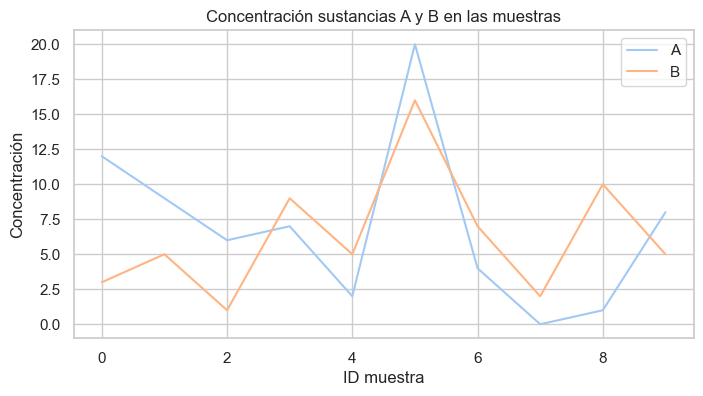

In [17]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(a, label='A')
ax.plot(b, label='B')
ax.set_xlabel('ID muestra')
ax.set_ylabel('Concentración')
ax.set_title('Concentración sustancias A y B en las muestras')
ax.legend()
plt.show()

### Correlación de Pearson

Se procede a calcular la correlación de Pearson con y sin el outlier.

In [18]:
# Correlación con outlier
r, p = stats.pearsonr(a, b)
print(f"Correlación Pearson con outlier: r={r}, p-value={p}")

Correlación Pearson con outlier: r=0.517373115168915, p-value=0.12563522982639552


In [19]:
# Correlación sin outlier
r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

Correlación Pearson sin outlier: r=-0.18420184544326054, p-value=0.6351961086690546


Se confirma que, La observación número 5, tiene una gran influencia en el resultado de la correlación, siendo de 0.52 si está presente y de -0.18 si se excluye.

### Jackknife Pearson correlation

In [20]:
# Función Jackknife correlation
# ==============================================================================

def correlacion_jackknife(x, y):
    '''
    Esta función aplica el método de Jackknife para el cálculo del coeficiente
    de correlación de Pearson.
    
    
    Parameters
    ----------
    x : 1D np.ndarray, pd.Series 
        Variable X.
        
    y : 1D np.ndarray, pd.Series
        Variable y.     

    Returns 
    -------
    correlaciones: 1D np.ndarray
        Valor de correlación para cada iteración de Jackknife
    '''
    
    n = len(x)
    valores_jackknife = np.full(shape=n, fill_value=np.nan, dtype=float)
    
    for i in range(n):
        # Loop para excluir cada observación y calcular la correlación
        r = stats.pearsonr(np.delete(x, i), np.delete(y, i))[0]
        valores_jackknife[i] = r

    promedio_jackknife = np.nanmean(valores_jackknife)
    standar_error = np.sqrt(((n - 1) / n) * \
                    np.nansum((valores_jackknife - promedio_jackknife) ** 2))
    bias = (n - 1) * (promedio_jackknife - stats.pearsonr(x, y)[0])
    
    resultados = {
        'valores_jackknife' : valores_jackknife,
        'promedio'          : promedio_jackknife,
        'se'                : standar_error,
        'bias'              : bias
    }
    
    return resultados

In [21]:
correlacion = correlacion_jackknife(x=a, y=b)
print(f"Correlación jackknife: {correlacion['promedio']}\n")
print(f"Error estándar: {correlacion['se']}\n")
print(f"Error bias: {correlacion['bias']}\n")
print(f"Valores_jackknife: {correlacion['valores_jackknife']}\n")

Correlación jackknife: 0.47818566905534887

Error estándar: 0.6915097651492329

Error bias: -0.35268701502209554

Valores_jackknife: [ 0.64719522  0.53705998  0.54597653  0.52827609  0.51215595 -0.18420185
  0.53554935  0.44125573  0.69065085  0.52793883]



Para identificar si existe algún valor muy influyente, se puede graficar el cambio que produce en el coeficiente de regresión la exclusión de cada observación.

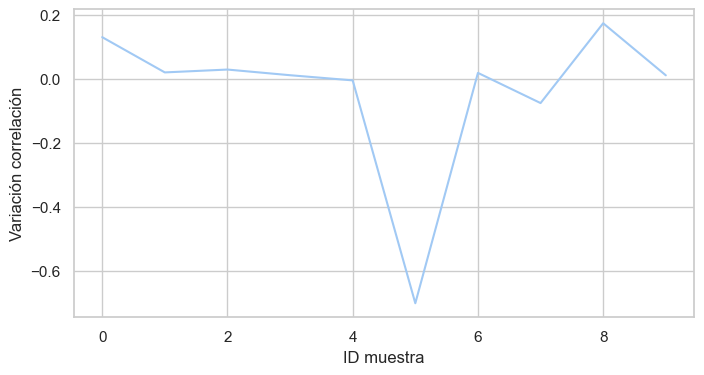

In [22]:
variacion_corr = correlacion['valores_jackknife'] - stats.pearsonr(a, b)[0]

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.plot(variacion_corr)
ax.set_xlabel('ID muestra')
ax.set_ylabel('Variación correlación')

plt.show()

El método Jackknife correlation solo ha sido capaz de amortiguar una pequeña parte de la influencia del outlier, sin embargo, sí ha permitido identificar qué observación está afectando en mayor medida.

## Ejemplo matriz de correlaciones

Cuando se dispone de múltiples variables numéricas, por ejemplo en problemas de modelado estadístico y machine learning, es conveniente estudiar el grado de correlación entre las variables disponibles.

Una forma de hacerlo es mediante matrices de correlación, en las que se muestra el coeficiente de correlación para cada par de variables

In [23]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/SaratogaHouses.csv')
datos = pd.read_csv(url, sep=",")

In [24]:
# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
       
# Variables numéricas
datos = datos.select_dtypes(include=['float64', 'int'])

In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   precio             1728 non-null   int64  
 1   metros_totales     1728 non-null   float64
 2   antiguedad         1728 non-null   int64  
 3   precio_terreno     1728 non-null   int64  
 4   metros_habitables  1728 non-null   int64  
 5   universitarios     1728 non-null   int64  
 6   dormitorios        1728 non-null   int64  
 7   chimenea           1728 non-null   int64  
 8   banyos             1728 non-null   float64
 9   habitaciones       1728 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 135.1 KB


In [26]:
datos.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
0,132500,0.09,42,50000,906,35,2,1,1.0,5
1,181115,0.92,0,22300,1953,51,3,0,2.5,6
2,109000,0.19,133,7300,1944,51,4,1,1.0,8
3,155000,0.41,13,18700,1944,51,3,1,1.5,5
4,86060,0.11,0,15000,840,51,2,0,1.0,3


In [27]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
metros_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
chimenea,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


Las matrices de correlación tienen el inconveniente de tener un tamaño notable cuando se dispone de muchas variables. Para facilitar la identificación de pares de variables con correlaciones altas, es conveniente convertirlas en formato de tabla larga _(tidy)_.

In [28]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [29]:
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
94,habitaciones,metros_habitables,0.733666,0.733666
49,metros_habitables,habitaciones,0.733666,0.733666
84,banyos,metros_habitables,0.718564,0.718564
48,metros_habitables,banyos,0.718564,0.718564
4,precio,metros_habitables,0.712390,0.712390
40,metros_habitables,precio,0.712390,0.712390
69,dormitorios,habitaciones,0.671863,0.671863
96,habitaciones,dormitorios,0.671863,0.671863
46,metros_habitables,dormitorios,0.656196,0.656196
64,dormitorios,metros_habitables,0.656196,0.656196


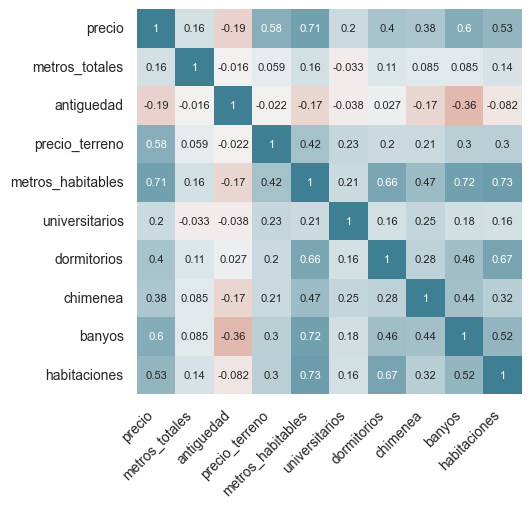

In [30]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## Ejemplo correlación parcial

Se quiere estudiar la relación entre las variables precio y peso de los automóviles. Se sospecha que esta relación podría estar influenciada por la variable potencia del motor, ya que a mayor peso del vehículo se requiere mayor potencia y, a su vez, motores más potentes son más caros.

### Datos

Para este ejemplo se utiliza el set de datos `Cars93` disponible en el paquete de **R** `MASS`.

In [31]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Cars93.csv')
datos = pd.read_csv(url)

In [32]:
datos.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [33]:
datos['log_Price'] = np.log(datos.Price)

In [34]:
datos.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,log_Price
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,2.766319
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,3.523415
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,3.370738
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,3.629660
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,3.401197


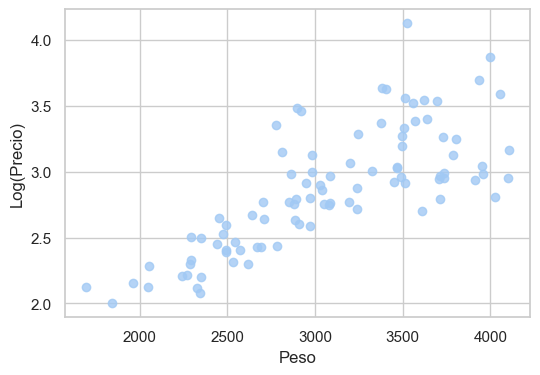

In [35]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.Weight, y=datos.log_Price, alpha= 0.8)
ax.set_xlabel('Peso')
ax.set_ylabel('Log(Precio)')
plt.show()

El gráfico muestra una clara relación lineal entre el peso de un coche y el logaritmo de su precio.

### Correlación 

In [36]:
# Cálculo de correlación lineal
# ==============================================================================
pg.corr(x=datos['Weight'], y=datos['log_Price'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,93,0.763544,"[0.66, 0.84]",5.640674e-19,1.069e+16,1.0


In [37]:
# Cálculo de correlación lineal parcial
# ==============================================================================
pg.partial_corr(data=datos, x='Weight', y='log_Price', covar='Horsepower', method='pearson')

,n,r,CI95%,p-val
pearson,93,0.404741,"[0.22, 0.56]",0.000063


### 

La correlación entre el peso y el logaritmo del precio es alta (r=0.764) y significativa ${pvalue \approx 0}$. Sin embargo, cuando se estudia su relación bloqueando la variable potencia de motor, a pesar de que la relación sigue siendo significativa, pasa a ser baja (r=0.4047).

Se puede afirmar que, la relación lineal existente entre el peso y el logaritmo del precio, está influenciada por el efecto de la variable potencia de motor.